In [1]:
import numpy as np
import pandas as pd

# 数据加载与预处理

In [2]:
df = pd.read_csv('./data/heart_2020_cleaned.csv')
df.head()             # 输出前5条数据

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [4]:
df =  df[df.columns].replace({'Yes':1, 'No':0,
                              'Male':1,'Female':0,
                              'No, borderline diabetes':0,'Yes (during pregnancy)':1})   # 注意Diabetic 有特殊的数值

In [5]:
BMI_bin = [0, 18.5, 24, 28, 100]
df['BMI'] = pd.cut(df['BMI'], BMI_bin, labels=False)

SleepTime_bin = [0, 6, 8, 24]
df['SleepTime'] = pd.cut(df['SleepTime'], SleepTime_bin, labels=False)

Health_bin = [-1, 10, 20, 30]
df['MentalHealth'] = pd.cut(df['MentalHealth'], Health_bin, labels=False)
df['PhysicalHealth'] = pd.cut(df['PhysicalHealth'], Health_bin, labels=False)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0,1,0,0,0,2,0,0,55-59,White,1,1,Very good,0,1,0,1
1,0,1,0,0,1,0,0,0,0,80 or older,White,0,1,Very good,1,0,0,0
2,0,2,1,0,0,1,2,0,1,65-69,White,1,1,Fair,1,1,0,0
3,0,2,0,0,0,0,0,0,0,75-79,White,0,0,Good,0,0,0,1
4,0,1,0,0,0,2,0,1,0,40-44,White,0,1,Very good,1,0,0,0


In [6]:
df = pd.get_dummies(df, drop_first=True)  # 转换为虚拟变量。这是计量经济学中常用的一个技巧
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,1,0,0,0,2,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,0,2,1,0,0,1,2,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,2,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   HeartDisease             319795 non-null  int64
 1   BMI                      319795 non-null  int64
 2   Smoking                  319795 non-null  int64
 3   AlcoholDrinking          319795 non-null  int64
 4   Stroke                   319795 non-null  int64
 5   PhysicalHealth           319795 non-null  int64
 6   MentalHealth             319795 non-null  int64
 7   DiffWalking              319795 non-null  int64
 8   Sex                      319795 non-null  int64
 9   Diabetic                 319795 non-null  int64
 10  PhysicalActivity         319795 non-null  int64
 11  SleepTime                319795 non-null  int64
 12  Asthma                   319795 non-null  int64
 13  KidneyDisease            319795 non-null  int64
 14  SkinCancer               319795 non-

In [8]:
# 处理类别不均衡的问题。先对数据集进行划分，然后对训练集进行平衡
from imblearn.over_sampling import SMOTE
# Set Training and Testing Data
from sklearn.model_selection import train_test_split

X = df.drop(columns=['HeartDisease'], axis=1)
y = df['HeartDisease']
X_res, X_test, y_res, y_test = train_test_split(X, y, shuffle=True, test_size=0.2, random_state=5)  # 划分训练集和测试集

X_train, y_train = SMOTE().fit_resample(X_res, y_res)  # 进行类别均衡操作

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (467850, 35)
Shape of testing feature: (63959, 35)
Shape of training label: (467850,)
Shape of testing label: (63959,)


In [9]:
from collections import Counter
print('训练集类别分布：', Counter(y_train), '\n测试集类别分布：', Counter(y_test))

训练集类别分布： Counter({0: 233925, 1: 233925}) 
测试集类别分布： Counter({0: 58497, 1: 5462})


# 用自写模型处理

In [11]:
from RandomForestClassification import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,
                             max_depth=5,
                             min_samples_split=6,
                             min_samples_leaf=2,
                             min_split_gain=0.0,
                             colsample_bytree="sqrt",
                             subsample=1,
                             random_state=66,
                             oob_score=True)
clf.fit(X_train, y_train)

A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has been built!
A tree has 

In [12]:
from sklearn.metrics import accuracy_score, average_precision_score

print('the acc of train set:', accuracy_score(y_train, clf.predict(X_train)))

y_pred, y_prob = clf.predict(X_test, return_prob=True)
print('the acc of test set:', accuracy_score(y_test, y_pred))
print('AUPRC:', average_precision_score(y_test, y_prob))
oob_error = clf.oob_errors(y_train)
print(f'oob_error:{oob_error}')

the acc of train set: 0.7057283317302554
the acc of test set: 0.8127394111852906
AUPRC: 0.30262196289163545
oob_error:0.300303516084215


In [13]:
test_errors = []
for i in range(1, 100+1):
    pred = clf.predict(X_test, num_trees=i)
    acc = accuracy_score(y_test, pred)
    test_errors.append(1-acc)

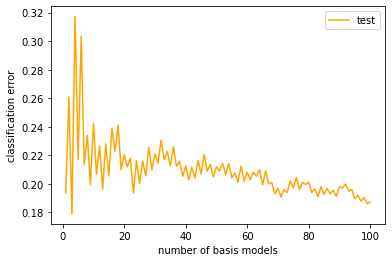

In [14]:
# Plot the  test error against the number of models (from 1 to 100).
import matplotlib.pyplot as plt

fig1 = plt.figure('figure1')
plt.plot(list(range(1, len(test_errors)+1)), test_errors, color = 'orange', label = 'test')
plt.xlabel("number of basis models")
plt.ylabel("classification error")
plt.legend(loc = 1)
plt.show()
fig1.savefig('./test_errors-100.png')

## 用sklearn中的函数包进行处理，对结果进行比较

In [15]:
from sklearn.ensemble import RandomForestClassifier as SKRandomForestClassifier
clf_sk = SKRandomForestClassifier(n_estimators=100, max_depth=5, random_state=0, oob_score=True)
clf_sk.fit(X_train, y_train)
y_pred = clf_sk.predict(X_test)
print('the acc of sklearn package: ', accuracy_score(y_test, y_pred))
print(f"AUPRC={average_precision_score(y_test, y_pred, average='micro')}")
print(f'the oob score of package: {clf_sk.oob_score_}')

the acc of sklearn package:  0.7584859050329117
AUPRC=0.1784660227480156
the oob score of package: 0.7202073314096399
